In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

In [23]:
df = pd.read_csv('Clean_LoanData.csv')

In [24]:
df = df.drop(['Unnamed: 0'], axis=1)

In [25]:
df

,CreditScore,FirstTimeHomebuyer,MIP,PPM,EverDelinquent,MonthsDelinquent,DTI_cat,MIR_cat,IntRate_cat,OCLTV_cat
0,0,0,25,0,0,0,2,1,1,0
1,0,0,0,0,0,0,1,2,1,1
2,0,0,0,0,0,0,1,2,2,1
3,0,0,0,0,0,0,1,0,2,2
4,0,0,0,0,0,0,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...
291446,839,0,0,0,0,0,2,0,2,1
291447,840,0,0,0,0,0,1,1,1,1
291448,840,0,0,0,0,0,2,0,1,1
291449,845,0,0,0,0,0,0,0,2,2


In [26]:
df.dtypes

CreditScore           int64
FirstTimeHomebuyer    int64
MIP                   int64
PPM                   int64
EverDelinquent        int64
MonthsDelinquent      int64
DTI_cat               int64
MIR_cat               int64
IntRate_cat           int64
OCLTV_cat             int64
dtype: object

In [28]:
df

,CreditScore,FirstTimeHomebuyer,MIP,PPM,EverDelinquent,MonthsDelinquent,DTI_cat,MIR_cat,IntRate_cat,OCLTV_cat
0,0,0,25,0,0,0,2,1,1,0
1,0,0,0,0,0,0,1,2,1,1
2,0,0,0,0,0,0,1,2,2,1
3,0,0,0,0,0,0,1,0,2,2
4,0,0,0,0,0,0,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...
291446,839,0,0,0,0,0,2,0,2,1
291447,840,0,0,0,0,0,1,1,1,1
291448,840,0,0,0,0,0,2,0,1,1
291449,845,0,0,0,0,0,0,0,2,2


In [29]:
X = df.drop(['EverDelinquent'], axis =1)

In [30]:
Y = df['EverDelinquent']

In [31]:
from imblearn.under_sampling import RandomUnderSampler

In [32]:
under_sampler = RandomUnderSampler()
X_res, y_res = under_sampler.fit_resample(X, Y)

In [33]:
X_res

,CreditScore,FirstTimeHomebuyer,MIP,PPM,MonthsDelinquent,DTI_cat,MIR_cat,IntRate_cat,OCLTV_cat
0,672,2,30,0,0,2,0,0,0
1,687,0,0,0,0,1,0,0,1
2,702,0,12,0,0,0,1,0,2
3,790,0,0,0,0,1,0,0,1
4,746,0,0,0,0,2,1,2,2
...,...,...,...,...,...,...,...,...,...
115321,818,0,0,0,5,0,2,1,1
115322,819,0,0,0,1,2,2,2,2
115323,826,0,0,0,3,1,2,0,1
115324,826,0,0,0,1,1,2,2,1


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.33, random_state=None)

In [40]:
y_test.value_counts()

1    19077
0    18981
Name: EverDelinquent, dtype: int64

In [41]:
X_train

,CreditScore,FirstTimeHomebuyer,MIP,PPM,MonthsDelinquent,DTI_cat,MIR_cat,IntRate_cat,OCLTV_cat
98628,716,0,0,1,12,0,0,2,2
112992,775,0,25,0,1,0,1,2,0
44290,666,0,0,0,0,0,1,1,1
25891,793,0,0,0,0,1,2,1,1
76551,656,1,25,1,30,1,2,1,0
...,...,...,...,...,...,...,...,...,...
87014,683,0,0,0,8,2,2,2,1
89772,690,0,0,0,1,1,2,0,1
111721,767,1,0,0,1,1,2,0,2
9225,670,1,0,0,0,2,1,2,2


In [42]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=10, criterion='entropy', max_depth = 3)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=10)

In [43]:
#Predictions
y_pred=clf.predict(X_test)

In [47]:
import pickle

In [48]:
import joblib

In [49]:
joblib.dump(clf, "./random_forest.joblib")

['./random_forest.joblib']

In [18]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
accuracy = float(cm.diagonal().sum())/len(y_test)
print("\nAccuracy Of Random Forest For The Given Dataset : ", accuracy)


Accuracy Of Random Forest For The Given Dataset :  1.0


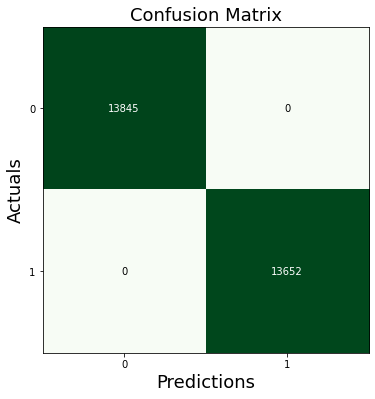

In [20]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [22]:
# accuracy: (tp + tn) / (p + n)
accuracy = 100*accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

Accuracy: 100.000000
Precision: 1.000000
Recall: 1.000000
F1 score: 1.000000


In [23]:
from sklearn.metrics import classification_report

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13845
           1       1.00      1.00      1.00     13652

    accuracy                           1.00     27497
   macro avg       1.00      1.00      1.00     27497
weighted avg       1.00      1.00      1.00     27497

